<a href="https://colab.research.google.com/github/espressoD/Midterm-UTS-ML/blob/Assesment3/clustering_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Install gdown if not already installed
!pip install -U -q gdown

In [17]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 20.1MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load Data
path = '/content/Machine Learning/clusteringmidterm.csv'
df = pd.read_csv(path)

# Drop CUST_ID karena tidak berguna untuk clustering
df = df.drop('CUST_ID', axis=1)

print(f"Ukuran Data: {df.shape}")

# 2. Cek & Isi Missing Values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

print("Jumlah Missing Values setelah handling:")
print(df.isna().sum().sum()) # Harusnya 0

Ukuran Data: (8950, 17)
Jumlah Missing Values setelah handling:
0


/tmp/ipython-input-1209018111.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
/tmp/ipython-input-1209018111.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [19]:
#Cell 2: Scaling
# Standarisasi Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Ubah kembali jadi DataFrame agar rapi (opsional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("Data berhasil di-scaling.")

Data berhasil di-scaling.


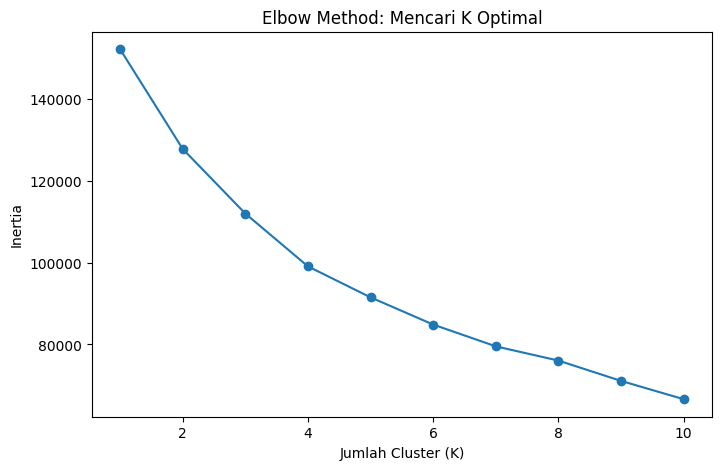

In [20]:
#Cell 3: Menentukan Jumlah Cluster (Elbow Method)
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method: Mencari K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.show()

In [21]:
#Cell 4: Modelling & Clustering
# Ganti n_clusters dengan angka yang kamu pilih dari Elbow Method
k_best = 4

model_kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=10)
labels = model_kmeans.fit_predict(df_scaled)

# Masukkan hasil cluster ke data ASLI (sebelum di-scale) untuk dianalisis
df['Cluster'] = labels

print("Contoh hasil clustering:")
print(df[['BALANCE', 'PURCHASES', 'Cluster']].head())

Contoh hasil clustering:
       BALANCE  PURCHASES  Cluster
0    40.900749      95.40        3
1  3202.467416       0.00        2
2  2495.148862     773.17        0
3  1666.670542    1499.00        3
4   817.714335      16.00        3


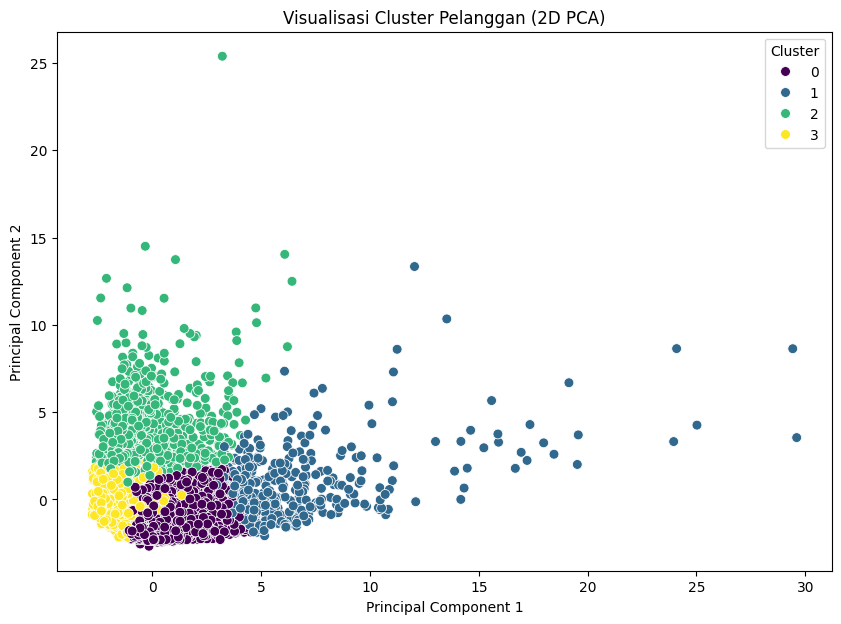

In [22]:
#Cell 5: Visualisasi (PCA - 2 Dimensi)
from sklearn.decomposition import PCA

# Ringkas 17 fitur jadi 2 fitur utama (PC1, PC2)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Buat Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.title(f'Visualisasi Cluster Pelanggan (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [23]:
#Cell 6: Interpretasi
# Lihat rata-rata fitur per cluster
summary = df.groupby('Cluster').mean()
print(summary[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT']])

             BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                       
0         894.907458  1236.178934        593.974874              642.478274   
1        3551.153761  7681.620098       5095.878826             2587.208264   
2        4602.462714   501.896219        320.373681              181.607404   
3        1011.751528   269.973466        209.853863               60.386625   

         CREDIT_LIMIT  
Cluster                
0         4213.207678  
1         9696.943765  
2         7546.957050  
3         3277.703165  


In [24]:
# Cell Tambahan: Perbandingan Model & Evaluasi
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# --- 1. Evaluasi K-Means (Model yang sudah dibuat) ---
# Pakai label yang sudah ada di df['Cluster']
score_kmeans = silhouette_score(df_scaled, labels)
print(f"Silhouette Score K-Means (K=4): {score_kmeans:.4f}")

# --- 2. Model Pembanding: Hierarchical Clustering ---
# Bagus untuk melihat struktur data hirarkis
hc_model = AgglomerativeClustering(n_clusters=4)
hc_labels = hc_model.fit_predict(df_scaled)

score_hc = silhouette_score(df_scaled, hc_labels)
print(f"Silhouette Score Hierarchical: {score_hc:.4f}")

# --- 3. Model Pembanding: DBSCAN ---
# Bagus untuk mendeteksi outlier (noise), tidak perlu tentukan jumlah cluster di awal
# eps dan min_samples perlu di-tuning, ini settingan standar
dbscan = DBSCAN(eps=2.0, min_samples=10)
db_labels = dbscan.fit_predict(df_scaled)

# DBSCAN akan memberi label -1 untuk noise (data sampah)
# Kita hitung score hanya jika terbentuk lebih dari 1 cluster
if len(set(db_labels)) > 1:
    score_db = silhouette_score(df_scaled, db_labels)
    print(f"Silhouette Score DBSCAN: {score_db:.4f}")
    print(f"Jumlah Cluster DBSCAN: {len(set(db_labels)) - (1 if -1 in db_labels else 0)}")
else:
    print("DBSCAN menganggap semua data sebagai satu cluster/noise dengan parameter ini.")

print("-" * 30)
print("Interpretasi: Score tertinggi menunjukkan model dengan pemisahan cluster terbaik.")

Silhouette Score K-Means (K=4): 0.1976
Silhouette Score Hierarchical: 0.1547
Silhouette Score DBSCAN: 0.4643
Jumlah Cluster DBSCAN: 1
------------------------------
Interpretasi: Score tertinggi menunjukkan model dengan pemisahan cluster terbaik.
